In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
harmful_2_df = pd.read_csv('harmful_2_learning.csv')
#columns = ['url','img_num','child_num','harmful_weight','learn_idx']

harmful_url_dic = {'sex': 1, 'porn': 1, 'gay': 1, 'movi': 1, 'movie': 1, 'tube': 1, 'pornhub':1,
                   'xxx': 1, 'fuck': 1, 'pic': 1, 'dick': 1, 'hot': 1,
                   'anal': 1, 'asian': 1, 'adult': 1, 'shemal': 1, 'cartoon':1,
                   'pictur': 1, 'picture': 1, 'lesbian': 1,

                   'teen': 2, 'big': 2, 'girl': 2, 'pussi': 2, 'ass': 2, 'tit': 2, 'amateur': 2, 'matur': 2, 'boy': 2,
                   'babe': 2, 'cock': 2,'milf': 2, 'sexi': 2, 'bebe':2, 'nud':2,
                   'pic': 2, 'blond': 2, 'nude': 2, 'hairi': 2, 'blowjob': 2, 'cum': 2, 'young': 2,
                   'hardcor': 2, 'hardcore': 2 ,

                   'game': 3, 'casino': 3, 'play': 3, 'onlin': 3,'online':3, 
                   'card': 3,  'race': 3,  'admin': 3,

                   'escort': 4, 'london': 4, 'servic': 4, 'service':4, 'agenc': 4,
                   'galleri': 4,'massag': 4, 'model': 4, 'femal': 4, 'fmale': 4,
                   'vip': 4, 'book': 4, 'uk': 4, 'russian': 4, 'profil': 4,
                   'busti': 4, 'class': 4, 'adult': 4, 'york': 4,
                   
                   'cam':5, 'video':5, 'chat':5, 'webcam': 5,
                   
                   'domain':7, 'domains':7, 'gateway':7
}

def word_idx(top20):
    list = top20.split()
    for word in list:
        if word in harmful_url_dic:
            return harmful_url_dic[word]
            break;
    return 0

def img_idx(num):
    if num < 10 : return 0
    elif (num >=10)&(num<50): return 1
    elif (num >=50)&(num<100): return 2
    elif (num >=100)&(num<200): return 3
    else: return 4

def child_idx(num):
    if num < 5 : return 0
    elif (num >=5)&(num<10): return 1
    elif (num >=10)&(num<25): return 2
    else: return 3

def img_child(img, child):
    if img >= child: return 0
    else: return 1

def target(wi, ic, hw):
    if hw < 0.125 :
        if wi == 0: return 0
        elif wi == 7: return 7
        else: return wi
        
    elif hw >= 0.125 and hw < 0.5:
        if ic == 1 : return 6
        else: return wi
        
    # harmful_weight >= 0.5    
    else:
        if wi == 0 or wi ==7 : return 7
        elif ic == 1: return 6
        else: return wi
    
harmful_2_df['word_idx'] = harmful_2_df['top_word'].apply(lambda x : word_idx(x))
harmful_2_df['img_child'] = harmful_2_df.apply(lambda x : img_child(x['img_num'],x['child_num']),axis=1)
harmful_2_df['img_num'] = harmful_2_df['img_num'].apply(lambda x : img_idx(x))
harmful_2_df['child_num'] = harmful_2_df['child_num'].apply(lambda x : child_idx(x))
 
harmful_2_df['target'] = harmful_2_df.apply(lambda x : target(x['word_idx'],x['img_child'],x['harmful_weight']),axis=1)

harmful_2_df.head(3)

,url_id,url,url_harmful_idx,harmful_word_num,harmful_child_num,img_num,child_num,harmful_weight,top_word,word_idx,img_child,target
0,5,madteenies.com,2,10,3,1,1,0.750,big password free login mad madthumb porn porn...,2,0,2
1,15,porntube.com,1,10,4,1,1,0.750,big anal blond fuck babe pussi ass hard hot in...,2,0,2
2,51,mydickdorms.com,1,3,7,3,2,0.575,bareback author dude first last licens mg mode...,4,0,4


In [26]:
print(harmful_2_df.shape)
harmful_2_df.describe()

(500, 12)


,url_id,url_harmful_idx,harmful_word_num,harmful_child_num,img_num,child_num,harmful_weight,word_idx,img_child,target
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,1829.508000,0.802000,5.33400,20.880000,1.338000,1.460000,0.323350,2.226000,0.260000,2.87400
std,904.128333,1.405256,4.11781,32.098633,1.264497,1.127361,0.292446,1.898983,0.439074,2.29361
min,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1106.750000,0.000000,2.00000,2.000000,0.000000,0.000000,0.075000,1.000000,0.000000,1.00000
50%,2000.000000,0.000000,4.00000,7.000000,1.000000,1.000000,0.187500,2.000000,0.000000,2.00000
75%,2583.000000,1.000000,8.00000,23.000000,2.000000,2.000000,0.625000,4.000000,1.000000,5.00000
max,3300.000000,5.000000,19.00000,180.000000,4.000000,3.000000,0.950000,7.000000,1.000000,7.00000


In [49]:
harmDF = harmful_2_df[['url_harmful_idx','img_num','child_num','harmful_weight','word_idx']]
harmDF.data = harmDF.values.tolist()
harmDF.target = harmful_2_df[['target']]
harmDF.feature_names=['url_harmful_idx','img_num','child_num','harmful_weight','word_idx']
harmDF.target_names=['none','porn','teen','gambling','escort','cam','hub','domain']

In [50]:
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리

X_train , X_test , y_train , y_test = train_test_split(harmDF.data, harmDF.target,
                                                       test_size=0.2,  random_state=11)
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=156, splitter='best')

In [51]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=harmDF.target_names ,
feature_names = harmDF.feature_names, impurity=True, filled=True)

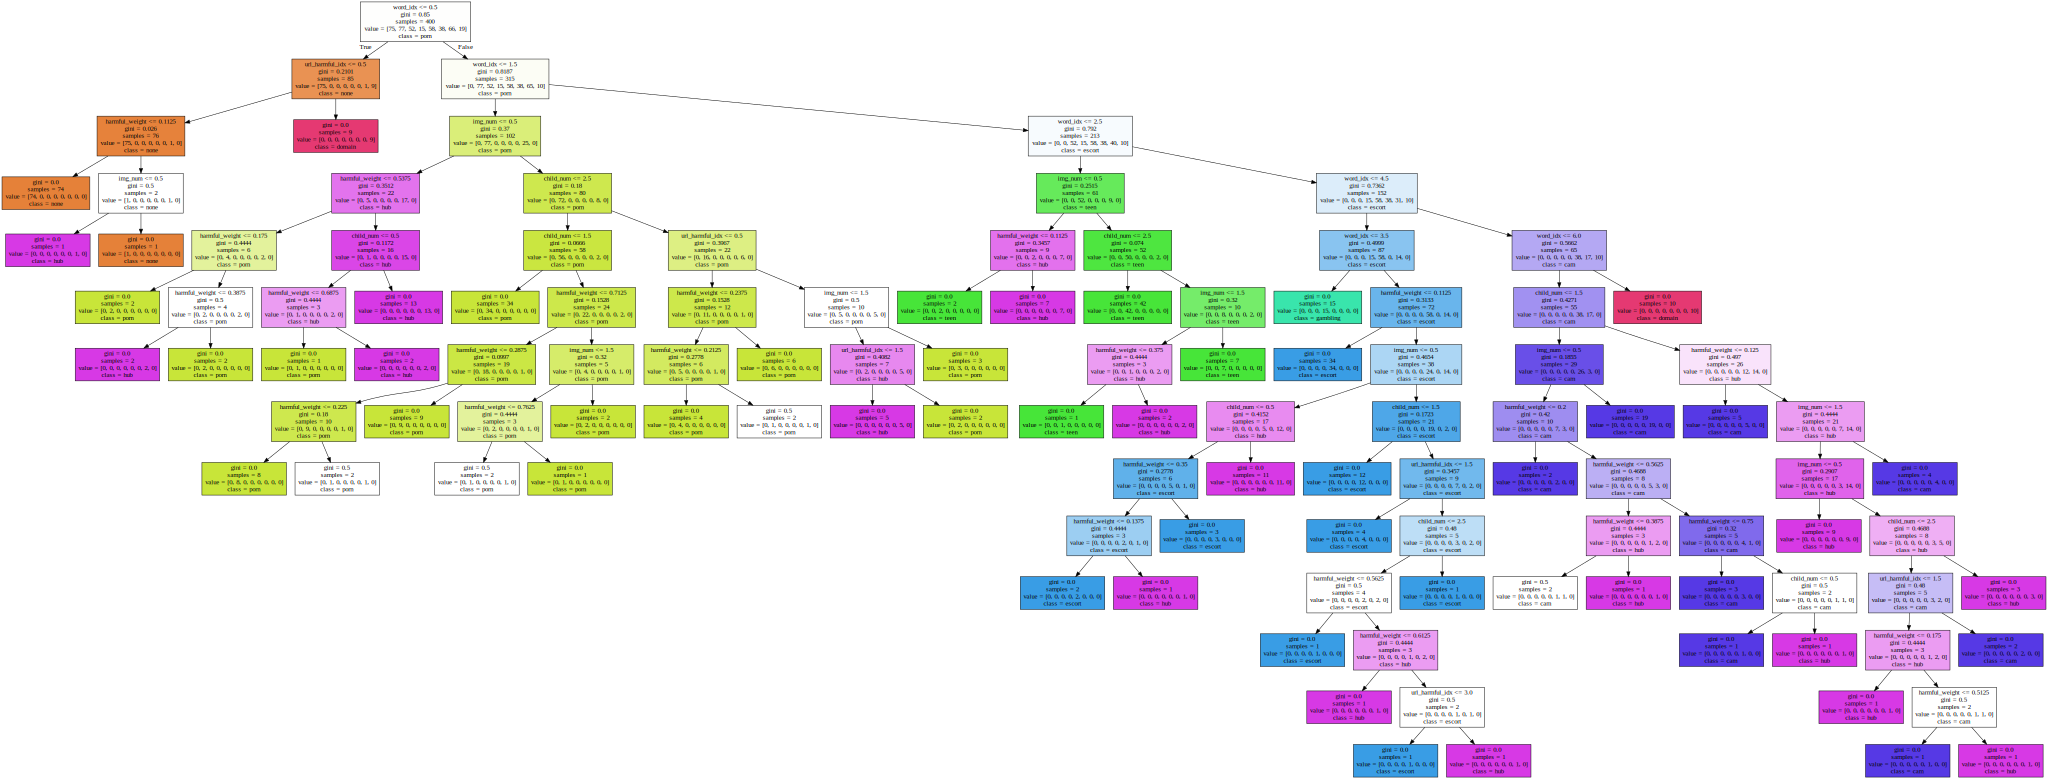

In [52]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[ 0.07   0.128  0.051  0.088  0.664]
url_harmful_idx : 0.070
img_num : 0.128
child_num : 0.051
harmful_weight : 0.088
word_idx : 0.664


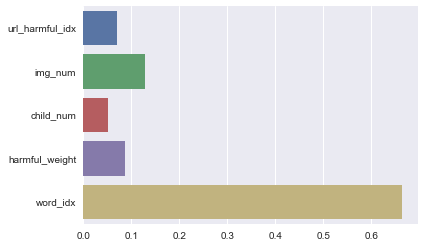

In [53]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(harmDF.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=harmDF.feature_names)

In [56]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.9200
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


In [59]:
from sklearn.model_selection import GridSearchCV

max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8800
max_depth = 8 정확도: 0.9200
max_depth = 10 정확도: 0.9200
max_depth = 12 정확도: 0.9200
max_depth = 16 정확도: 0.9200
max_depth = 20 정확도: 0.9200
max_depth = 24 정확도: 0.9200


In [65]:


params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


IndexError: too many indices for array

NameError: name 'best_df_clf' is not defined